# Interview questions

### 1 - Given the following function 
$$ f(x,t) = e^{-\omega t^{2}} cos( \frac{n \pi x}{L} ) $$
### Find the following partial derivatives 
### a) $\frac{\partial f}{\partial x}$
Answer: 
To find the partial derivative above, we assume that t is a real constant and f just depends on x, then we derivate the expression like in univariate calculus. Using the chain rule we obtain
$$ \frac{\partial f}{\partial x} = -e^{-\omega t^{2}} sin( \frac{n \pi x}{L} ) \frac{n \pi}{L} $$

### b) $\frac{\partial f}{\partial t}$
Answer:
Analogously to the previous item, we obtain
$$\frac{\partial f}{\partial t} = - 2 \omega t e^{-\omega t^{2}} cos( \frac{n \pi x}{L} ) $$



### 2 - Give an example of a linear vector space (with a basis)
Answer: 
One of the best examples of a linear vector space is the Euclidian Space. More precisely, the Euclidian space is the set of a $x_i \in \mathbb{R}$ where $ 1 \leq i \leq n$ and $ x = (x_1, x_2, ... , x_n) \in \mathbb{R}^{n}$. A basis is a set of values in $\mathbb{R}^{n}$ with n elements, that generates the entire Euclidian Space and are linear independent. A basis of a linear vector space is not unique in general. For this example, a basis is a set S:
$e_i \in \mathbb{R}^{n}$, where $ 1 \leq i \leq n, S = \left\{e_1, e_2, ... , e_n \right\}$ and, $e_1 = (1, 0,0, ..., 0), e_2 = (0, 1, 0, 0, ..., 0), ... , e_n = (0, 0, 0, ..., 0, 1)$, i.e, $e_i = (0,0, ...,0,1,0,...,0)$ be the n-tuple with all components equal to 0, except the ith, which is 1. 

### 3 - Find the inverse for the matrix A = $ \begin{pmatrix}
    a & b \\
    c & d 
    \end{pmatrix}$
    
Answer: 
To find the inverse for the matrix A. We look for scalars x, y, z, w such that
$$ \begin{pmatrix}
    a & b \\
    c & d 
    \end{pmatrix} \begin{pmatrix}
    x & y \\
    z & w 
    \end{pmatrix} = \begin{pmatrix}
    1 & 0 \\
    0 & 1 
    \end{pmatrix} \Longleftrightarrow	
\begin{pmatrix}
    ax + bz & ay + bw \\
    cx + dz & cy + dw 
    \end{pmatrix} = \begin{pmatrix}
    1 & 0 \\
    0 & 1 
    \end{pmatrix}$$
What it means we have two linear systems to solve, 
$$ \begin{array} aax + bz = 1 \\ cx + dz = 0 \end{array} $$  and $$ \begin{array} aay + bw = 0 \\ cy + dw = 1 \end{array} $$
we have cx = -dz and ay = - bw (1), so 
$$ ax + bz = 1 \Longleftrightarrow a(\frac{-dz}{c}) + bz = 1 \Longleftrightarrow -adz + cbz = c \Longleftrightarrow z = \frac{-c}{ad - cb} $$
and, 
    $$ cy + dw = 1 \Longleftrightarrow c(\frac{-bw}{a}) + dw = 1 \Longleftrightarrow -cbw + adw = a \Longleftrightarrow w = \frac{a}{ad - cb}$$
these equations make sense if, and only if, $det(A) = ad - bc \neq 0 $. Replacing z and w in (1), we get 
$$ x = \frac{d}{ad - bc}$$ and $$ y = \frac{-b}{ad - bc }$$

Lastly,
$$ A^{-1} = \frac{1}{det(A)} \begin{pmatrix}
                                d & -b \\
                                -c & a
                                \end{pmatrix}$$

### 4 - Give a definition and an example of a supervised learning algorithm

Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. 

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. Note that, our model is $y = ax + b$, where x is a vector with n coordinates that are the number of parameters and y is the predict. $a,b$ are modeled by the method of lest-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.

Bellow we see an example using sklearn.


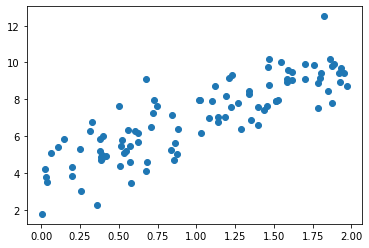

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Generate linear data, whith gaussian noise 
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)
plt.scatter(x,y)

The linear regression equation is y = 3.009389256265985 * x + 3.9551501578486787


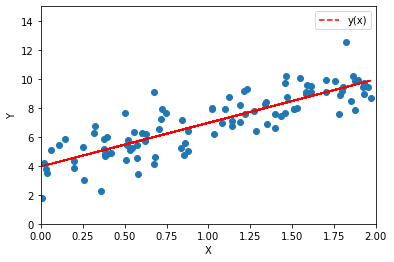

In [2]:
#import the library, call the function and fit the data. 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
#method to get the coefficients a and b. 
angular = lin_reg.coef_[0]
linear = lin_reg.intercept_
#Plot the graph 
reta = angular*x + linear
plt.scatter(x,y);
plt.plot(x, reta,'r--', label='y(x)', color='red');
plt.axis([0,2,0,15]);
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

print(f'The linear regression equation is y = {float(angular)} * x + {float(linear)}')

### 5 - Give a definition and an example of a unsupervised learning algorithm
Unsupervised learning (UL) is a type of algorithm that learns patterns from untagged data. It's just the opposite from the class of supervised models. Here we don't now the output and with these models we expected find implicit relationships between variables. 

To illustrate, we will use the sklearn library to quantize colors using the algorithm k-means clustering wich is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [13]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import cv2 as cv

#Reading the image and setting the amount of colors after quantization using the k-means algorithm;
image = cv.imread('bird_1.jpg')
colors = 16
cv.imshow('img',image)
cv.waitKey()

#Image normalization;
img_normal = np.reshape(image, (-1, 3))
img_normal = img_normal / 255

#Model adjustment and training;
img_train = shuffle(img_normal, random_state=0)
kmeans = KMeans(n_clusters=colors, random_state=0).fit(img_train)
labels = kmeans.predict(img_normal)
centers = kmeans.cluster_centers_

#Results obtained and reset to default 'uint8';
img_clusters = np.reshape(centers[labels], image.shape)
img_clusters = np.uint8(img_clusters*255)
cv.imshow('img_clusters',img_clusters)
cv.waitKey()
# cv.imwrite('img_clusters.jpg', img_clusters)

-1

### 6 - Name 3 types of metrics, and their formulas, used in K-Means clustering algorithm

Let's present 3 types of metrics: 

#### Manhattan Distance:  Manhattan distance is calculated as the sum of the absolute differences between the two vectors.


$$ dist_{x,y} := \sum_{i=0}^{n} |x_i - y_i| $$

#### Chebychev Distance: Chebychev Distance is also known as maximum value distance and is computed as the absolute magnitude of the differences between coordinate of a pair of objects

$$ dist_{x,y} := max (|x_i - y_i|) $$

#### Minkowski Distance: Minkowski Distance is the generalized metric distance. Note that when p=2, the distance becomes the Euclidean distance.

$$ dist_{x,y} =  (\sum_{i=1}^{n} |x_i - y_1|^p)^{\frac{1}{p}} $$

### 7. Name and describe any algorithm to inverte a Matrix

A variant of Gaussian elimination called Gauss-Jordan elimination can be used for finding the inverse of a matrix. If A is $n \times n$ then one can use row reduction to compute its inverse matrix. 

First, the $n \times n$ is augmented to the right of A, forming an $n \times 2n$ matrix with two blocks A and $I_{n \times n}$. If A can be reduced to the identity matrix I, in this case the right block is a inverse of A.

For example, consider 

$$ A = \begin{pmatrix} 
        2 & -1 & 0\\
        -1 & 2 & -1\\
        0 & -1 & 2 
        \end{pmatrix}$$
To find the inverse of this matrix, one takes the following matrix augmented by the identity and row-reduces it as a $3 \times 6$ matrix.

$$ A|I = \begin{pmatrix} 
        2 & -1 & 0 & 1 & 0 & 0\\
        -1 & 2 & -1 & 0 & 1 & 0\\
        0 & -1 & 2  & 0 & 0 & 1
        \end{pmatrix}
        $$

By performing row operations, when the initial matrix becomes the identity matrix then the identity matrix will be called the inverse of the initial matrix.

$$ I|B = \begin{pmatrix} 
        1 & 0 & 0 & \frac{3}{4} & \frac{1}{2} & \frac{1}{4}\\
        0 & 1 & 0 & \frac{1}{2} & 1 & \frac{1}{2}\\
        0 & 0 & 1  & \frac{1}{4} & \frac{1}{2} & \frac{3}{4}
        \end{pmatrix} $$
        
B is the inverse of matrix A, can be denoted by B = $A^{-1}$.

$$ B = \begin{pmatrix} 
        \frac{3}{4} & \frac{1}{2} & \frac{1}{4}\\
        \frac{1}{2} & 1 & \frac{1}{2}\\
        \frac{1}{4} & \frac{1}{2} & \frac{3}{4}
        \end{pmatrix} $$


### 8. Explain what is a logistic regression and give an example of application (describe it as best as you can).

Logistic regression is a statistical technique that allows predicting binary values as a function of a sequence of independent random variables. 

It is commonly used to estimate the probability that an instance belongs to a certain class. Therefore, logistic regression can be seen as a binary classifier.

Estimated probability logistic regression model

$$ p = h_{\theta}(x) := \sigma(\theta^t \dot x)$$

$$ \sigma(t) := \frac{1}{1+e^t} $$

Logistic regression model prediction y = 0 , if p < 0,5 and y = 1 if p $\geq$ 0,5. 

p is the probability of x belongs to a class 

y is the indicator function

$\theta_i$ are the model parameters

$x_i$ is the i-th feature


The cost function of a training instance can be defined by$ c(\theta) =  -log(p)$, if y = 1 and,  $ c(\theta) =  -log(1 - p)$, if y = 0.

The cost function in relation to the training set is simply the average cost in relation to all training instances.

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y_i log(p_i) + (1 - y_i)log(1 - p_i)]$$

Where m is the shape of x and $\theta$.

The training objective is to define the vector of parameters $\theta$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y=0).


Here we will apply a logistic regression to the iris dataset. Let's predict when the flower type is iris-virginica based on petal width.

First, we import the libraries and get a vector x containing petal width and the target of this value, y. 

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
x = iris['data'][:, 3:]
y = (iris['target']==2).astype(int)

Now we split x and y into training and testing sets. We apply functions to define model parameters.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.25)
mymodel = LogisticRegression(max_iter=120)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=120)

In [6]:
mymodel.predict(X_test)
mymodel.score(X_test, y_test)

0.9210526315789473

mymodel.score says that the accuracy of our model when applied to test data is approximately 94%

### 9. Describe in steps how would you perform preliminary analysis on a dataset

In an exploratory data analysis, we have two things to do. 

Checking the data types is the first step, here we need to format numeric data, date data, etc. which may be in the wrong format and put it as the object it actually is.

After this step, we proceed in order to obtain dataset information. Group values ​​with certain characteristics, apply formulas to generate other columns, plot graphs for easy viewing

For an example, in portuguese, follow the link for an exploratory dataset analysis of the FIFA 21 game data: https://github.com/felpcoder/EDA-Fifa21/blob/main/ead_fifa21.ipynb

### 10. Given the two tables A and B, give the result for the query below

SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club

From A

LEFT JOIN B

ON A.ID = B.ID;

In [7]:
import pandas as pd
A = { 'ID': ['9991', '9992', '9993', '9994'], 'Name':['John', 'Paul', 'Ringo', 'George'], 'Born_in': ['Liverpool', 'Liverpool', 'Liverpool','Liverpool']}
B = { 'ID': ['9991', '9992', '9993', '9995', '9992'], 'Instrument':['Vocal', 'Base', 'Drums', 'Guitar', 'Piano'], 'Football_club':['Liverpool', 'Liverpool', 'Liverpool', 'Arsenal', 'Liverpool'] }

In [8]:
table_a = pd.DataFrame.from_dict(A)
table_b = pd.DataFrame.from_dict(B)

In [9]:
table_a.head()

,ID,Name,Born_in
0,9991,John,Liverpool
1,9992,Paul,Liverpool
2,9993,Ringo,Liverpool
3,9994,George,Liverpool


In [10]:
table_b.head()

,ID,Instrument,Football_club
0,9991,Vocal,Liverpool
1,9992,Base,Liverpool
2,9993,Drums,Liverpool
3,9995,Guitar,Arsenal
4,9992,Piano,Liverpool


The result of query is 

In [20]:
result = {'ID': ['9991', '9992', '9993', '9994','9992'], 'Name':['John', 'Paul', 'Ringo', 'George', 'Paul'], 'Born_in': ['Liverpool', 'Liverpool', 'Liverpool','Liverpool', 'Liverpool'], 'Instrument': ['Vocal', 'Base', 'Drums', 'Nan', 'Piano'], 'Football_club': ['Liverpool', 'Liverpool', 'Liverpool', 'Nan', 'Liverpool']   }

In [21]:
table_result = pd.DataFrame.from_dict(result)

In [22]:
table_result

,ID,Name,Born_in,Instrument,Football_club
0,9991,John,Liverpool,Vocal,Liverpool
1,9992,Paul,Liverpool,Base,Liverpool
2,9993,Ringo,Liverpool,Drums,Liverpool
3,9994,George,Liverpool,Nan,Nan
4,9992,Paul,Liverpool,Piano,Liverpool
